<a href="https://colab.research.google.com/github/shilpi8504/FRM-Analysis/blob/main/FRM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

#Import Online Retail Data containing transactions from 01/12/2010 and 09/12/2011
Rtl_data = pd.read_csv('/content/Retaildatasets.csv', encoding = 'unicode_escape')
Rtl_data.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,01/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01/12/10 8:26,3.39,17850.0,United Kingdom


In [ ]:

#Check the shape (number of columns and rows) in the dataset
Rtl_data.shape

(316773, 8)

In [ ]:
#Customer distribution by country
country_cust_data=Rtl_data[['Country','CustomerID']].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)


,Country,CustomerID
35,United Kingdom,3019
14,Germany,73
13,France,69
3,Belgium,24
30,Spain,23
32,Switzerland,17
27,Portugal,12
19,Italy,11
1,Austria,10
0,Australia,9


In [ ]:
#Keep only United Kingdom data
Rtl_data = Rtl_data.query("Country=='United Kingdom'").reset_index(drop=True)


In [ ]:

#Check for missing values in the dataset
Rtl_data.isnull().sum(axis=0)

ï»¿InvoiceNo        0
StockCode           0
Description      1128
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID      84919
Country             0
dtype: int64

In [ ]:

#Remove missing values from CustomerID column, can ignore missing values in description column
Rtl_data = Rtl_data[pd.notnull(Rtl_data['CustomerID'])]

In [ ]:

#Validate if there are any negative values in Quantity column
Rtl_data.Quantity.min()

-74215.0

In [ ]:
#Validate if there are any negative values in UnitPrice column
Rtl_data.UnitPrice.min()

0.0

In [ ]:

#Filter out records with negative values
Rtl_data = Rtl_data[(Rtl_data['Quantity']>0)]

In [ ]:


#Convert the string date field to datetime
Rtl_data['InvoiceDate'] = pd.to_datetime(Rtl_data['InvoiceDate'])

In [ ]:


#Add new column depicting total amount
Rtl_data['TotalAmount'] = Rtl_data['Quantity'] * Rtl_data['UnitPrice']

In [ ]:

#Check the shape (number of columns and rows) in the dataset after data is cleaned
Rtl_data.shape

(199542, 9)

In [ ]:
Rtl_data.head(15)


,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,2010-01-12 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6.0,2010-01-12 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,2010-01-12 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-01-12 08:34:00,1.69,13047.0,United Kingdom,54.08


In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt



In [ ]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

In [ ]:
#Create RFM Modelling scores for each customer
RFMScores = Rtl_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'ï»¿InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})


In [ ]:
#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)




In [ ]:
#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'ï»¿InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

In [ ]:
RFMScores.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,109,70,2769.40
2,12748.0,4,1963,13494.45
3,12749.0,65,128,2755.23
4,12820.0,326,11,170.46


In [ ]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()


count    2981.000000
mean      171.262999
std       125.082131
min         1.000000
25%        97.000000
50%       149.000000
75%       235.000000
max       696.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


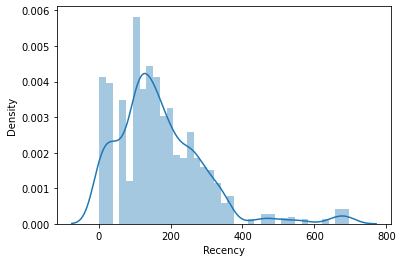

In [ ]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


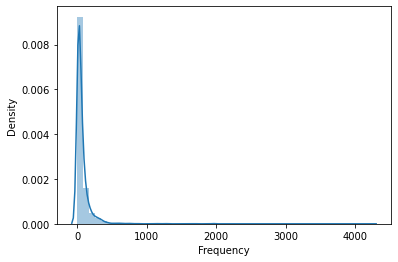

In [ ]:

#Recency distribution plot
import seaborn as sns
x = RFMScores['Frequency']

ax = sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    2981.00000
mean       66.93794
std       135.12122
min         1.00000
25%        14.00000
50%        32.00000
75%        76.00000
max      4222.00000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


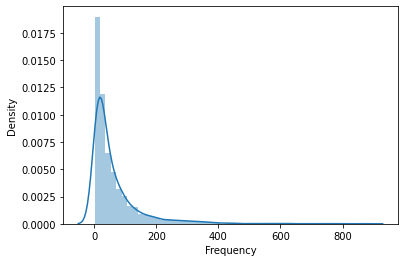

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count      2981.000000
mean       1414.281202
std        4626.155490
min           2.900000
25%         249.000000
50%         524.500000
75%        1270.420000
max      130537.230000
Name: Monetary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


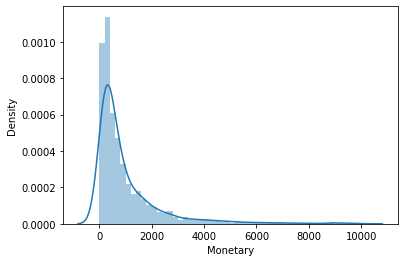

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

In [ ]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Frequency': {0.25: 14.0, 0.5: 32.0, 0.75: 76.0},
 'Monetary': {0.25: 249.0, 0.5: 524.5000000000001, 0.75: 1270.4200000000003},
 'Recency': {0.25: 97.0, 0.5: 149.0, 0.75: 235.0}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,109,70,2769.40,2,2,1
12748.0,4,1963,13494.45,1,1,1
12749.0,65,128,2755.23,1,1,1
12820.0,326,11,170.46,4,4,4


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,109,70,2769.40,2,2,1,221,5
12748.0,4,1963,13494.45,1,1,1,111,3
12749.0,65,128,2755.23,1,1,1,111,3
12820.0,326,11,170.46,4,4,4,444,12


In [98]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,109,70,2769.40,2,2,1,221,5,Platinum
2,12748.0,4,1963,13494.45,1,1,1,111,3,Platinum
3,12749.0,65,128,2755.23,1,1,1,111,3,Platinum
4,12820.0,326,11,170.46,4,4,4,444,12,Bronze


In [99]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,94,158,130537.23,1,1,1,111,3,Platinum
1,17450.0,2,185,85770.34,1,1,1,111,3,Platinum
2,17511.0,5,626,56175.47,1,1,1,111,3,Platinum
3,16029.0,34,175,52387.24,1,1,1,111,3,Platinum
4,13694.0,65,445,45911.64,1,1,1,111,3,Platinum
5,15311.0,8,1701,45131.27,1,1,1,111,3,Platinum
6,15769.0,97,85,41326.72,1,1,1,111,3,Platinum
7,13089.0,5,1285,38328.46,1,1,1,111,3,Platinum
8,15061.0,4,298,36575.00,1,1,1,111,3,Platinum
9,16422.0,31,287,28566.72,1,1,1,111,3,Platinum
